In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = (8,6)
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('Credit Card.csv')
df_copy = df.copy()
print('Shape of the data frame is:', df.shape)

Shape of the data frame is: (8950, 18)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [36]:
df.isnull().sum(axis=0)*100/df.shape[0]

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [37]:
important_columns = ['BALANCE',
                     'BALANCE_FREQUENCY',
                     'PURCHASES',
                     'ONEOFF_PURCHASES',
                     'INSTALLMENTS_PURCHASES',
                     'CASH_ADVANCE',
                     'PURCHASES_FREQUENCY',
                     'ONEOFF_PURCHASES_FREQUENCY',
                     'PURCHASES_INSTALLMENTS_FREQUENCY',
                     'CASH_ADVANCE_FREQUENCY',
                     'CASH_ADVANCE_TRX',
                     'PURCHASES_TRX',
                     'CREDIT_LIMIT',
                     'PAYMENTS',
                     'MINIMUM_PAYMENTS',
                     'PRC_FULL_PAYMENT'] 
final_data = df[important_columns].dropna()

In [38]:
corr_matrix = final_data.corr()

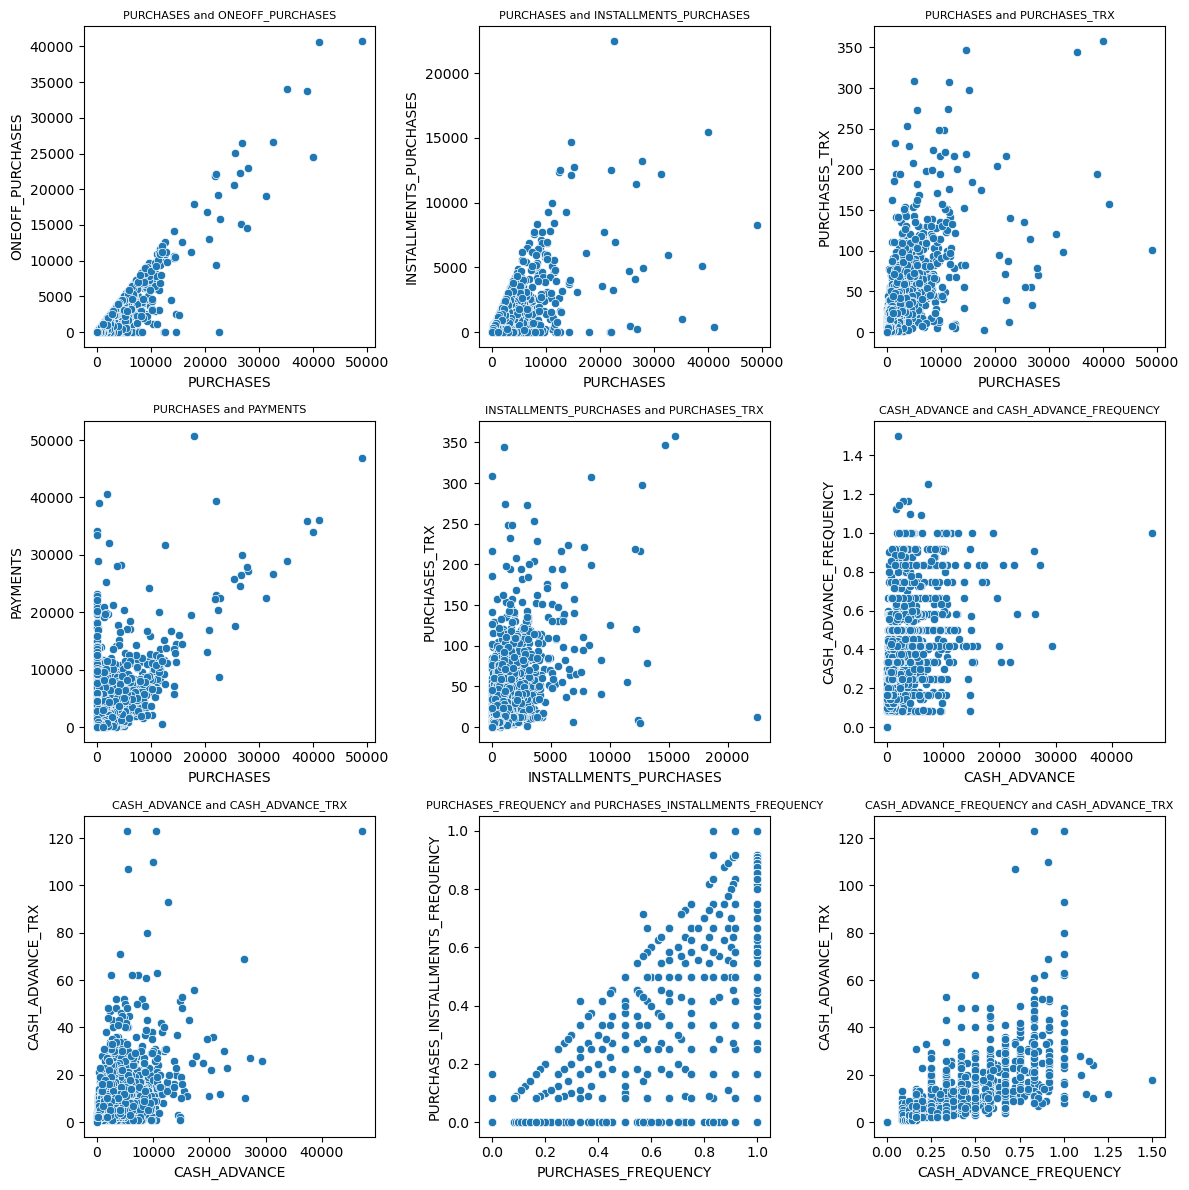

In [44]:
# Find pairs of columns with correlation greater than 0.60or less than -0.6
high_corr_pairs = []
checked = set() 
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.6 and (col2, col1) not in checked:
            high_corr_pairs.append((col1, col2))
            checked.add((col1, col2))

# Create subplots
num_pairs = len(high_corr_pairs)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_pairs + num_cols - 1) // num_cols  # Number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,12))

# scatter plot matrix for the selected pairs
for i, pair in enumerate(high_corr_pairs):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.scatterplot(data=final_data, x=pair[0], y=pair[1], ax=ax)
    ax.set_title(f'{pair[0]} and {pair[1]}', fontsize=8)

plt.tight_layout()
plt.show()

#### <center>Distribution of important columns </center>

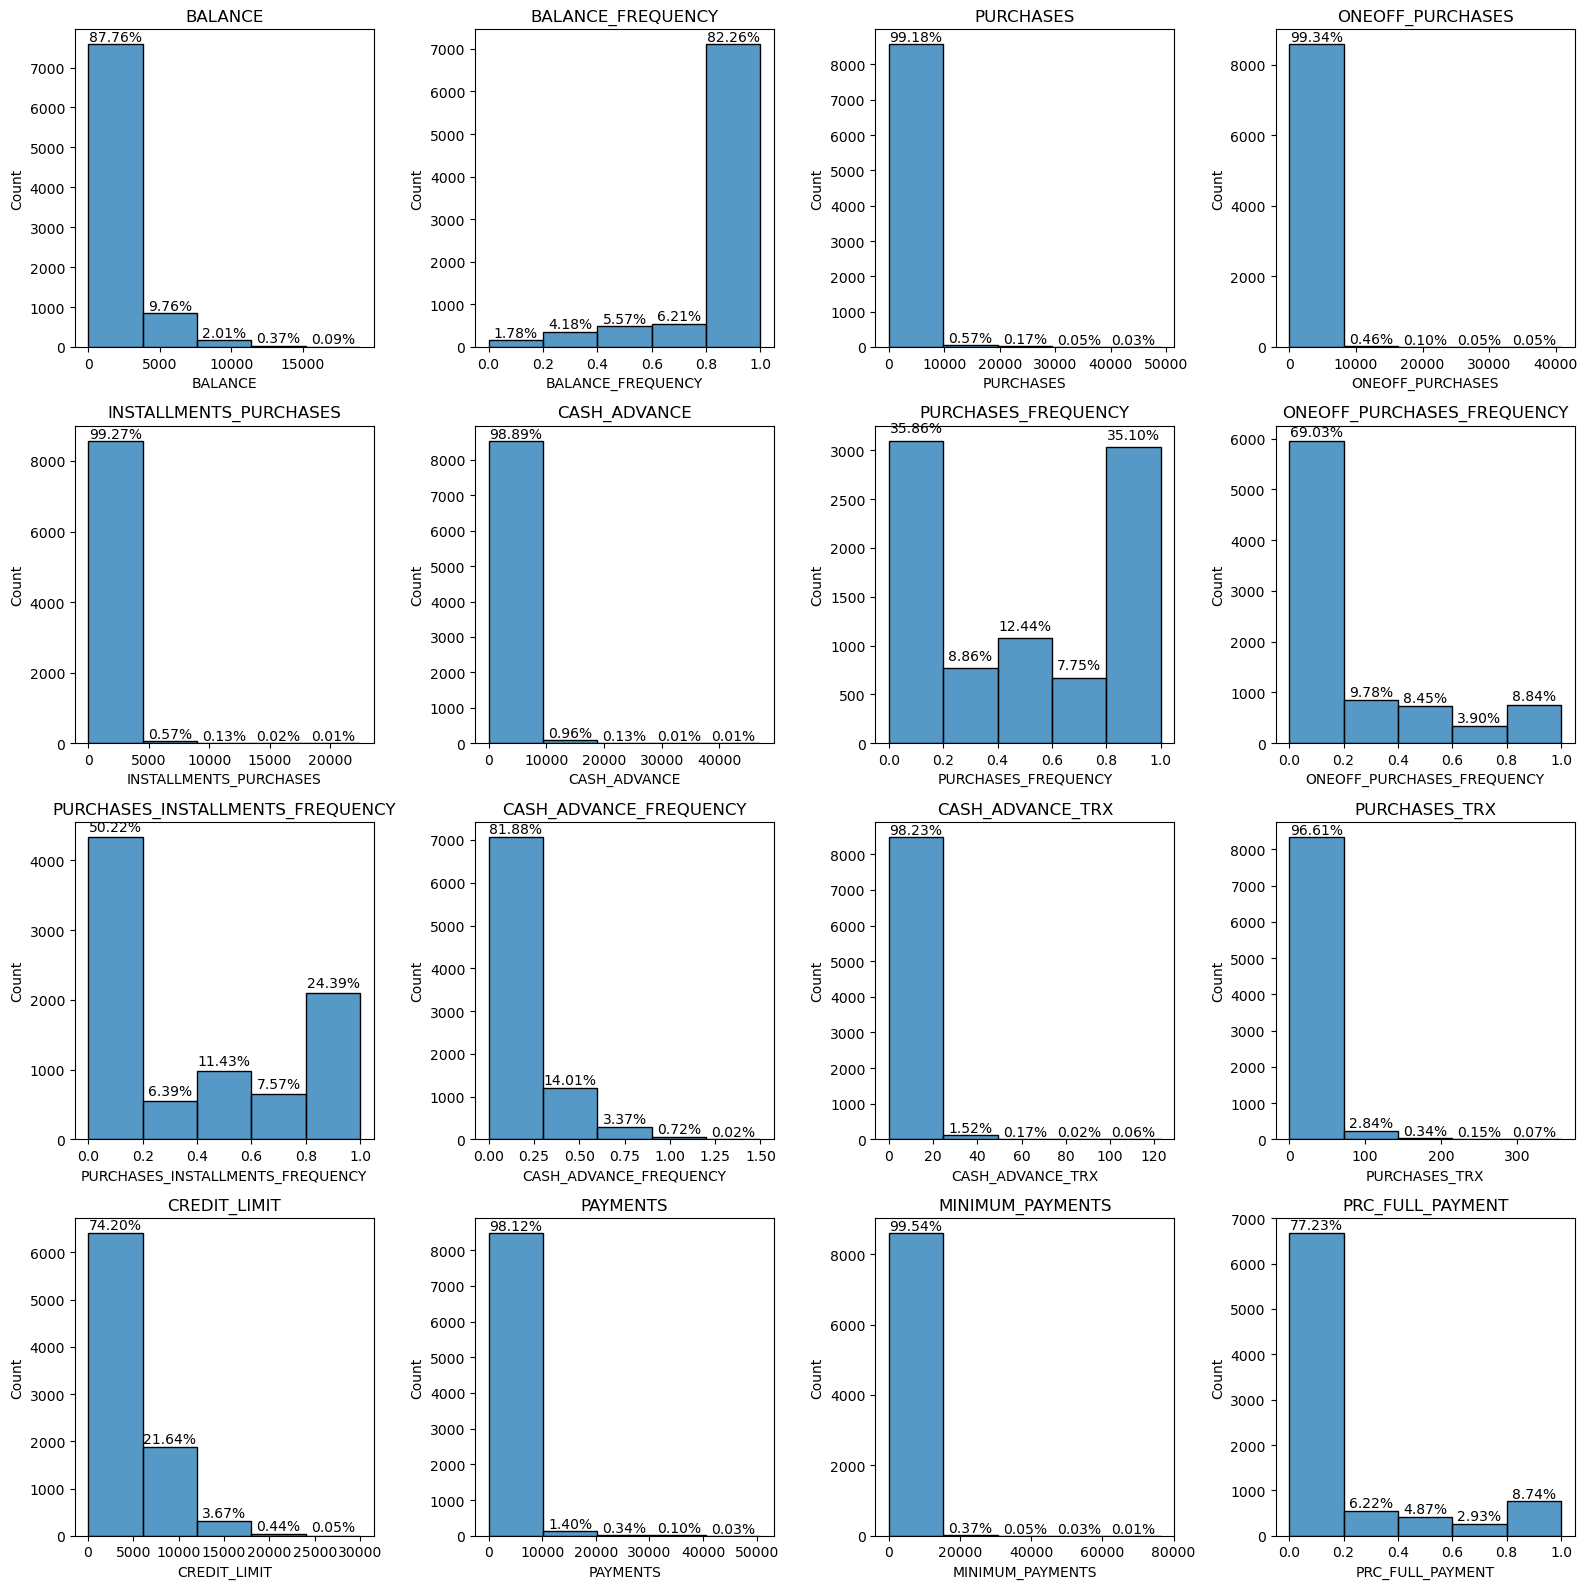

In [47]:
# Histograms for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16,16))

for i, col in enumerate(important_columns):
    row, col_num = divmod(i, 4)
    sns.histplot(final_data[col], bins=5, kde=False, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)
    
    # percentage
    total = len(final_data[col])
    for p in axes[row, col_num].patches:
        height = p.get_height()
        axes[row, col_num].text(p.get_x() + p.get_width() / 2.,
                                height + 0.01 * total,
                                '{:.2%}'.format(height / total),
                                ha="center")

plt.tight_layout()
plt.show()